In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [59]:
timesteps = 5
features = 1

In [66]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(timesteps, features)))  # 可调整
model.add(Dropout(0.2))  # 可调整
model.add(LSTM(units=50, return_sequences=False))  # 可调整
model.add(Dropout(0.2))  # 可调整
model.add(Dense(units=25))  # 可调整
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/haotao.chen/Desktop/github/repositories/python/stock/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
code = "603259.SS"
data = yf.download(code)
close = data[["Close"]]
close.shape

[*********************100%%**********************]  1 of 1 completed


(1496, 1)

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close)
scaled_close.shape

(1496, 1)

In [69]:
import numpy as np

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [70]:
X_train, Y_train = create_dataset(scaled_close, timesteps)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape


(1490, 5, 1)

In [71]:
model.fit(X_train, Y_train, batch_size=1, epochs=100)


Epoch 1/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0136
Epoch 2/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0019
Epoch 3/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0020
Epoch 4/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0019
Epoch 5/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0016
Epoch 6/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0015
Epoch 7/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0016
Epoch 8/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0016
Epoch 9/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0014
Epoch 10/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0013
Epoch 11/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0012
Epoch 12/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0014
Epoch 13/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0013
Epoch 14/100
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0014
Epoch 15/100
14

In [72]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
train_predict.shape

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


(1490, 1)

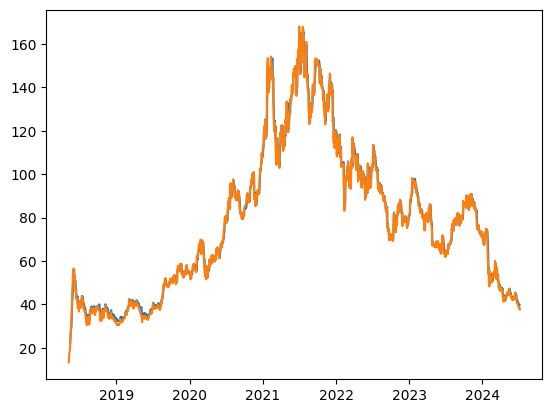

In [73]:
train_data_plot = np.empty_like(scaled_close)
train_data_plot[:, :] = np.nan
train_data_plot[timesteps:len(train_predict)+timesteps, :] = train_predict
plt.plot(close.index,train_data_plot)
plt.plot(close)
plt.show()

In [80]:
last_days = scaled_close[-timesteps:]
future_predictions = []
for _ in range(7):
    last_days = last_days.reshape(1, timesteps, last_days.shape[1])
    next_day_prediction = model.predict(last_days)
    future_predictions.append(next_day_prediction[0])
    next_day_data = np.array([next_day_prediction[0, 0], last_100_days[0, -1]])  # 添加预测的收盘价和前一天的交易量
    last_100_days = np.append(last_100_days[:, 1:, :], next_day_data.reshape(1, 1, 2), axis=1)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_predictions

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None